In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('dataset/gpt_dataset.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

In [5]:
df.sample(5)

,Category,Resume
211,Mechanical Engineer,SKILLS: â¢ Knowledge of software / computer: ...
818,ETL Developer,Computer skills: - Yes. SQL knowledge-yes Unix...
656,Network Security Engineer,Communication Skills My writing skills in Engl...
860,Blockchain,"SOFTWARE SKILLS: Languages: C, C++ & java Oper..."
832,DotNet Developer,Participated in intra college cricket competit...


In [6]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [7]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [8]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

#### Data Visualization

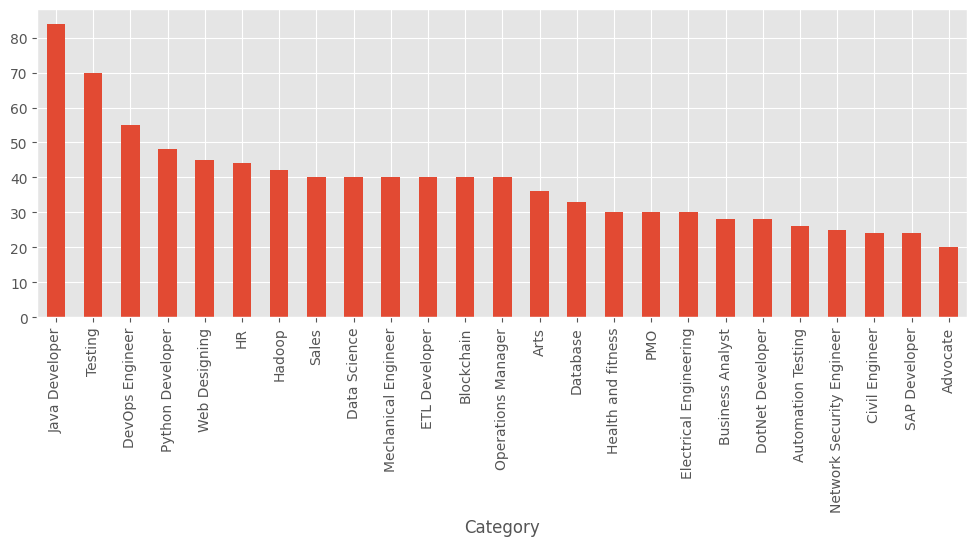

In [9]:
plt.figure(figsize=(12,4))
df['Category'].value_counts().plot(kind="bar")
plt.show()

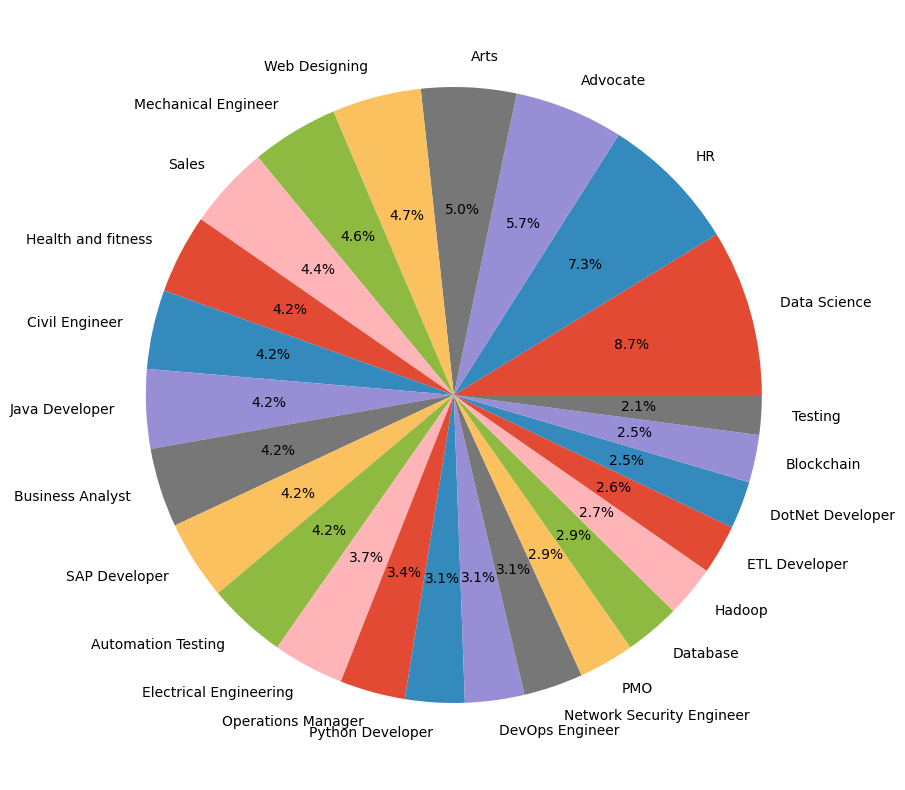

In [10]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts, labels = labels, autopct = '%1.1f%%')
plt.show()

#### Text cleaning using NLP


In [11]:
print(df['Resume'][961])

Skill Set OS Windows XP/7/8/8.1/10 Database MYSQL, sql server 2005, 2008 & 2012 Languages Core Java Web Technology HTML, CSS Testing Manual Testing, Database Testing Other Bug tracking and reporting, End user handling.Education Details 
January 2016 MCS  Pune, Maharashtra P.V.P College Pravaranagar
January 2011 HSC   A.K.Junior College
January 2009 SSC   A.K.Mahavidyalya
JR TESTING ENGINEER 

JR TESTING ENGINEER - M-Tech Innovations Ltd
Skill Details 
TESTING- Exprience - 24 months
WINDOWS XP- Exprience - 24 months
CSS- Exprience - 6 months
DATABASE- Exprience - 6 months
DATABASE TESTING- Exprience - 6 monthsCompany Details 
company - M-Tech Innovations Ltd
description - Responsibilities â¢     Analyzing the Testing Requirements â¢     Preparing Test Plans, Test Scenarios â¢     Preparing Test Cases â¢     Executing the test cases â¢     Tracking bugs â¢     Coordinating developers in order to fix it â¢     Preparing test summary reports â¢     Reporting quality manager â¢    

In [12]:
# Remove URL, Emails, Special Character, stop words
def clean(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b')
    clean_text = url_pattern.sub('', text)
    clean_text = email_pattern.sub('', clean_text)
    
    clean_text = re.sub('[^\w\s]', '', clean_text)
    stop_words = set(stopwords.words('english'))
    clean_text = ' '.join(word for word in clean_text.split() if word.lower() not in stop_words)
    
    return clean_text

<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:8: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Hamza\AppData\Local\Temp\ipykernel_2628\4222324953.py:8: SyntaxWarning: invalid escape sequence '\w'
  clean_text = re.sub('[^\w\s]', '', clean_text)


In [13]:
s = 'Hello, $%& I found this # article at https://www.chando.com ! You can contact me at chando@example.com'
clean(s)

'Hello found article contact'

In [14]:
df['Resume'] = df['Resume'].apply(lambda x:clean(x))

In [17]:
df['Resume'][900]

'COMPUTER PROFICIENCY â Basic MSOffice PowerPoint word Outlook Excel â Language Known Basics C CPP Java â Basics Networking â Basics command Linux PROJECT DETAILS Minor Project Details â Title Applocker Android â Project Area Android Application â Description Applocker provides protection System applications well Third party applications installed Android devices password protection provided help patterns volume keys Hence extra measure privacy acquired Major Project Details â Title Online Complaint System Cyber Crimes â Project Area Android Application â Description Online Complaint System Cyber Crimes android application use person lodged complaint Police station regarding cyber crime action taken within prescribed time constraint person directly use application help himher directly lodge complaint Commissioner Office get store Commissioners database necessary action taken STRENGTHS â Belief team work team member leader â Hard ethical workerEducation Details January 2013 January 2016

#### Encoding

In [18]:
le = LabelEncoder()
le.fit(df[['Category']])
df['Category'] = le.transform(df['Category'])

c:\Users\Hamza\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [22]:
tfidf = TfidfVectorizer()
tfidf.fit(df['Resume'])
resume = tfidf.transform(df['Resume'])  

In [23]:
X_train, X_test, y_train, y_test = train_test_split(resume, df['Category'], test_size = 0.2, random_state = 42)

In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(769, 8017)
(769,)
(193, 8017)
(193,)


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

In [26]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred = clf.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)

In [29]:
print(f"Accuarcy of the KNN Classifier on test data: {accuracy}")

Accuarcy of the KNN Classifier on test data-> : 0.9844559585492227


In [30]:
models = {
    'KNeighborsClassifier':KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'MultinomialNB': MultinomialNB(),
    'OneVsRestClassifier': OneVsRestClassifier(KNeighborsClassifier()) 
}

In [31]:
accuracy_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy  = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy
    print(f"Accuarcy of {model_name} on test data: {accuracy}")

Accuarcy of KNeighborsClassifier on test data: 0.9844559585492227
Accuarcy of LogisticRegression on test data: 0.9948186528497409
Accuarcy of RandomForestClassifier on test data: 1.0
Accuarcy of SVC on test data: 0.9948186528497409
Accuarcy of MultinomialNB on test data: 0.9792746113989638
Accuarcy of OneVsRestClassifier on test data: 0.9844559585492227


#### Best Model Is Logistic regression

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuarcy of the LogisticRegression on test data: {accuracy}")

Accuarcy of the LogisticRegression on test data-> : 0.9948186528497409


In [46]:
myresume = """
Data Analyst / Data Scientist
MUHAMMAD HAMZA	+923359588458 | mr.hamxa942@gmail.com 
https://www.linkedin.com/in/muhammad-hamza-khattak
https://github.com/mrhamxo
Peshawar Cantt, Peshawar

Objective
With a strong academic background in Data Science and hands-on experience from an AI / ML internship and personal projects, I specialize in data analysis, statistical analysis, data visualization, machine learning (ML), deep learning (DL), natural language processing (NLP), and SQL, Python programming. I am eager to leverage my expertise to contribute to a forward-thinking team and continue expanding my knowledge in artificial intelligence and data science.
Skills
Core Skills:
•	Data Analysis 
•	Statistical Analysis
•	Predictive Analysis
•	Data Visualization
•	Data Cleaning & Preprocessing
•	Machine Learning
•	Deep Learning	Technical Skills:
•	Python (NumPy, Pandas, Scikit-learn, Matplotlib, Seaborn)
•	SQL & Database Management
•	Power BI (Data Visualization Tools)
•	Excel (Advanced Functions, Pivot Tables)
•	ETL Processes (Extract, Transform, Load)
•	Cloud Platforms (AWS, Google Cloud)	Tools:
•	Power BI
•	Jupyter Notebooks
•	Google Colab
•	Jupyter Notebooks
•	Google Colab
•	NLTK / SpaCy (for NLP)
•	Git & GitHub
Work Experience
WEB DEVELOPER INTERN – NCAI – UET, Peshawar, Pak		 5 December 2022 – 5 June 2023
 
●	Car Parking system in php
●	Smart Weather Project in php
●	Weapon/car/medical disease image annotation for AI project.
 

AI / ML INTERN – ITSOLERA – Islamabad, Pak 	24 - July 2024 --- 24 - October 2024
•	Assisting in the development and optimization of machine & deep learning models for image and text data analysis, contributing to improved model accuracy.
•	Collaborating with senior data scientists / AI Engineer on implementing advanced algorithms, and performing data preprocessing, augmentation, and feature extraction.
•	Gaining hands-on experience with frameworks such as scit-learn, TensorFlow, and Keras for building and training machine & deep learning models.
Projects
CAR PRICE PREDICTION SYSTEM – PERSONAL PROJECT ----------------------------------------------------------- JUN 2024 – JUN 2024
•	Developed a machine learning model to predict car prices based on features such as make, model, year, mileage, condition.
•	Utilized regression algorithms to analyze historical car sales data and identify key factors influencing price.
•	Implemented data preprocessing techniques, including feature engineering, normalization, and handling missing values for improved model accuracy.
MOVIES RECOMMENDER SYSTEM - PERSONAL PROJECT ------------------------------------------ MAY 2024 – MAY 2024
●	Developed a content-based movie recommendation system using Python library like Pandas, NLTK, and scikit-learn.
●	Implemented cosine similarity to suggest movies based on user-selected titles using a Streamlit web interface.
●	Integrated TMDB API to dynamically fetch movie posters and store data efficiently using Pickle for quick retrieval.
FINANCE PROJECT - BANK ANALYSIS – PERSONAL PROJECT ----------------------------------------------------- APR 2024 – APR 2024
●	Utilized Excel, SQL, and Power BI to analyze loan performance metrics, including loan status, recovery rates, and credit risk, resulting in actionable insights for improving loan portfolio management.
●	Employed data-driven techniques to create models for forecasting loan performance, optimizing pricing strategies, and identifying key performance indicators to enhance decision-making and profitability.
●	Created summary, overview, and detailed dashboards in Power BI to visualize key metrics such as total funded amounts, interest rates, and debt-to-income ratios, facilitating better strategic planning and risk management.
E-COMMERCE SALES DASHBOARD (POWER BI) - PERSONAL PROJECT ----------------------------------- MAR 2024 – MAR 2024
●	Implemented complex parameters to enable drill-down within the worksheet and customization using filters.
●	Established connections, joined new tables, and performed calculations to manipulate data.
HR PROJECT DESIGN AND DASHBOARD (POWER BI, TEBLEAU, SQL) – PERSONAL PROJECT ----- FEB 2024 – FEB 2024
•	Utilized SQL queries to extract relevant HR data.
•	Designed and tested a dashboard for human resources management, integrating data from MySQL databases.
•	Created interactive dashboards to monitor employee performance, recruitment metrics, and training effectiveness using Power BI and Tableau.
PIZZA SALES REPORT (SQL & POWER BI) – PERSONAL PROJECT ---------------------------------------------- JAN 2024 – JAN 2024
•	Developed a comprehensive sales report for a pizza restaurant using SQL queries to extract & manipulate data from the database.
•	Designed interactive visualizations and dashboards in Power BI to provide actionable insights into sales performance, customer trends, and product preferences.
CUSTOMER SALES ANALYSIS - SEMESTER PROJECT ------------------------------------------------------------------- DEC 2023 – DEC 2023
•	Developed customer sales prediction models using Python libraries such as scikit-learn for predictive analytics.
•	Implemented an end-to-end data pipeline for customer data preprocessing, feature engineering, model training.
•	Successfully achieved an 85% accuracy rate in predicting customer purchasing behavior, contributing to increase in targeted marketing effectiveness through data analysis and statistical modeling.
Education
MASTER OF SCIENCE IN DATA SCIENCE – Pak Austria Fachhochschule Institute – Haripur, Pak 	October 2023 – Till Date
Majors: Tools & Techniques for DS, Statistical & Mathematical Method, Machine Learning, Deep Learning

BACHELOR OF SCIENCE IN SOFTWARE ENGINEERING – Islamia College University – Peshawar, Pak 	Sep 2018 – Aug 2022
Majors: Programming Language, Database Systems, Operating Systems and Intro to Artificial Intelligence
Certificates
 
•	Google Data Analytics 
•	Machine Learning, AI & Data Science 


"""

In [47]:
cleaned_resume = clean(myresume)
cleaned_resume

'Data Analyst Data Scientist MUHAMMAD HAMZA 923359588458 Peshawar Cantt Peshawar Objective strong academic background Data Science handson experience AI ML internship personal projects specialize data analysis statistical analysis data visualization machine learning ML deep learning DL natural language processing NLP SQL Python programming eager leverage expertise contribute forwardthinking team continue expanding knowledge artificial intelligence data science Skills Core Skills Data Analysis Statistical Analysis Predictive Analysis Data Visualization Data Cleaning Preprocessing Machine Learning Deep Learning Technical Skills Python NumPy Pandas Scikitlearn Matplotlib Seaborn SQL Database Management Power BI Data Visualization Tools Excel Advanced Functions Pivot Tables ETL Processes Extract Transform Load Cloud Platforms AWS Google Cloud Tools Power BI Jupyter Notebooks Google Colab Jupyter Notebooks Google Colab NLTK SpaCy NLP Git GitHub Work Experience WEB DEVELOPER INTERN NCAI UET 

In [48]:
input_features = tfidf.transform([cleaned_resume])
input_features

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 267 stored elements and shape (1, 8017)>

In [49]:
prediction_id = model.predict(input_features)[0]
prediction_id

np.int64(6)

In [50]:
category_map = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

In [51]:
category_name = category_map.get(prediction_id, "Unknown")
print("Predicted Category is:", category_name)

Predicted Category is: Data Science


In [45]:
import pickle
pickle.dump(tfidf, open('models/tfidf.pkl', 'wb'))
pickle.dump(model, open('models/model.pkl', 'wb'))